In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
traindata_0 = pd.read_csv('train_titanic.csv',index_col='PassengerId')
traindata_0.info()
traindata_0.head()
# 对缺失数据的声明，Age，Embarked，Cabin
# 先使用常规方法处理缺失数据。本期重点在PCA

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
traindata = traindata_0.copy()
# replace
traindata.Sex = traindata.Sex.replace({'female':0,'male':1}) # one hot
traindata.Embarked = traindata.Embarked.replace({'C':0,'Q':1,'S':2})
# fillna
traindata.Age.fillna(traindata.Age.mean(),inplace=True)
traindata.Embarked.fillna(method='ffill',inplace=True)
# drop
traindata.drop(columns=['Survived','Name','Ticket','Cabin'],inplace=True)
traindata.info()
print(traindata.head())

traindata.to_csv('data_pca.csv') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 7 columns):
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null float64
dtypes: float64(3), int64(4)
memory usage: 55.7 KB
             Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
PassengerId                                                    
1                 3    1  22.0      1      0   7.2500       2.0
2                 1    0  38.0      1      0  71.2833       0.0
3                 3    0  26.0      0      0   7.9250       2.0
4                 1    0  35.0      1      0  53.1000       2.0
5                 3    1  35.0      0      0   8.0500       2.0


In [4]:
# data=pd.read_csv('data_pca.csv',index_col='PassengerId')
data=pd.read_csv('cym_data_pca.csv')
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
# normalization
def norm_(x):
    xmean = np.mean(x,0)
    std = np.std(x,0)
    return (x-xmean)/std
data_ = norm_(data)
data_.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.162867e-15,-6.530609e-15,-7.078891e-16,-8.799835e-16,6.056471e-15,-1.146905e-15,-4.421380e-16,1.017347e-15,-1.965426e-15,5.289657e-16,...,-2.333224e-15,1.763674e-15,-1.198026e-15,5.049661e-16,-5.225658e-15,-2.174788e-15,6.856456e-16,-1.475094e-16,-2.288786e-15,2.531465e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


<IPython.core.display.Javascript object>


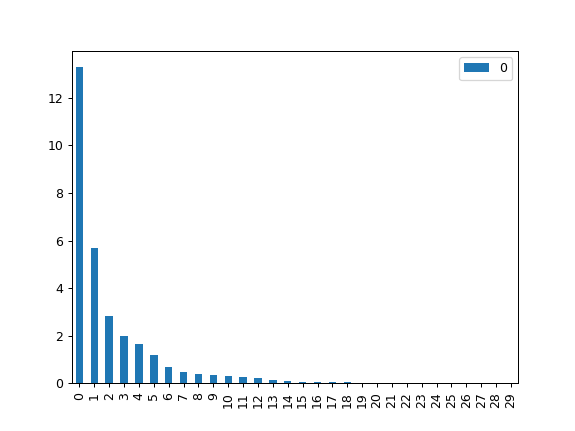

{'newData':              0          1         2         3         4
0     9.192837   1.948583 -1.123166  3.633731  1.195110
1     2.387802  -3.768172 -0.529293  1.118264 -0.621775
2     5.733896  -1.075174 -0.551748  0.912083  0.177086
3     7.122953  10.275589 -3.232790  0.152547  2.960878
4     3.935302  -1.948072  1.389767  2.940639 -0.546747
..         ...        ...       ...       ...       ...
564   6.439315  -3.576817  2.459487  1.177314  0.074824
565   3.793382  -3.584048  2.088476 -2.506028  0.510723
566   1.256179  -1.902297  0.562731 -2.089227 -1.809991
567  10.374794   1.672010 -1.877029 -2.356031  0.033742
568  -5.475243  -0.670637  1.490443 -2.299157  0.184703

[569 rows x 5 columns], 'evr': array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,


In [8]:
# V
# ew, ev = np.linalg.eig(data_.T.dot(data_))
ew, ev = np.linalg.eig(np.cov(data_.T))
ew_order = np.argsort(ew)[::-1]
ew_sort = ew[ew_order]
ev_sort = ev[:,ew_order]
print(ew_sort)
print(ev_sort)
pd.DataFrame(ew_sort).plot(kind='bar')
# V
V = ev_sort[:,:5]
# Xnew
X_new = data_.dot(V)
X_new.shape

In [7]:
# scatter
get_ipython().run_line_magic('matplotlib', 'notebook')
sc = plt.scatter(X_new.iloc[:,0],X_new.iloc[:,1],s=5,c=traindata_0.Survived,cmap=plt.cm.coolwarm)
plt.xlabel('PC 0')
plt.ylabel('PC 1')
plt.colorbar(sc)

<IPython.core.display.Javascript object>

ValueError: 'c' argument has 891 elements, which is not acceptable for use with 'x' with size 569, 'y' with size 569.

In [ ]:
print(V)
print(data_.columns)